# Machine Learning for Signal Processing
## Assignment:  Optimization and Regularization

<table style="font-size: 100%;">
    <tr>
        <th>Student names</th>
        <th>Student number</th>
    </tr>
    <tr>
        <td>Jie Zhang</td>
        <td>1616528</td>
    </tr>
    <tr>
        <td>Rundong Zhang</td>
        <td>1554301</td>
    </tr>
</table>

## 1. Error backpropagation

**Q1: Implement your backpropagation algorithm in Python.**

**Q2: For a correctly implemented backprop, do you expect the loss need to
monotoniously decrease? Why (or why not)?**

If the backprop is correcly implemented, the loss should monotoniously decrease. Because it is based on the gradient of loss function, thus the loss should decrease along the opposite direction of its gradient. While in reality, it may oscillate if the learning rate is too big.

## 2. Optimization

**Q3: Explain how and why ”SGD with momentum”, ”AdaGrad”, ”RMSprop”,
and ”Adam” improve convergence w.r.t. plain SGD. What are their advantages
and possible disadvantages?**

- SGD with momentum: The Momentum algorithm borrows the concept of momentum in physics. It simulates the inertia of an object when it is moving. It retains the previously updated direction to a certain extent when updating, and uses the gradient of the current batch to slightly tune the final update direction. In this way, the stability can be increased to a certain extent, so that the learning is faster, and there is a certain ability to get rid of the local optimum. The advantage and disadvantage is that, if the direction of the current gradient is consistent with the historical gradient, the gradient will be enhanced. If the current gradient is inconsistent with the historical direction, the gradient will be attenuated.


- AdaGrad: The Adagrad algorithm can automatically adjust the learning rate during training, and use a larger α update for the parameters with a lower frequency; on the contrary, use a smaller α update for the parameters with a higher frequency. Therefore, the advantage of Adagrad is that it's very suitable for processing sparse data.


- RMSprop: Because Adagrad will accumulate all the previous gradient squares, RMSprop only calculates the corresponding average value, so it can alleviate the problem of rapid decline in the learning rate of the Adagrad algorithm.


- Adam: Adam is a combination of Momentum algorithm and RMSprop algorithm. It uses the first-order moment estimation and the second-order moment estimation of the gradient to dynamically adjust the learning rate of each parameter. The main advantage of Adam is that after bias correction, each iteration of the learning rate has a certain range, which makes the parameters relatively stable.

**Q4: Implement all of these solvers for the above model (default parameters),
and evaluate the convergence of all parameters, as well as the cost as a function
of the number of iterations. Plot these convergence graphs, include them in
your report, and discuss the results. Also include a scatter plot of the input
data points (x1 vs x2) and their classification. Note: use at least 50000 iterations.**

SGD: learning rate = 0.0001
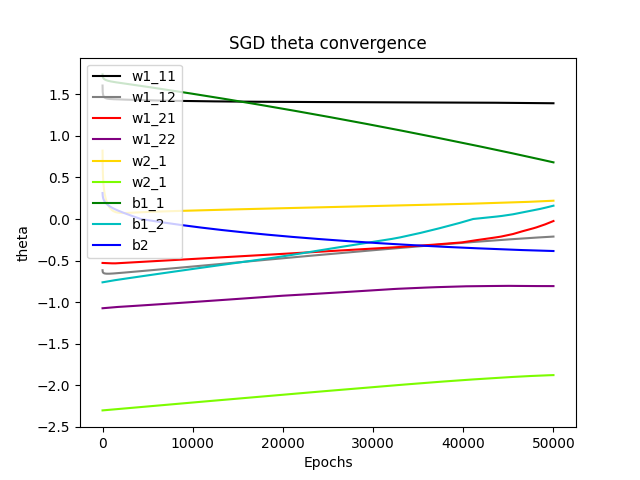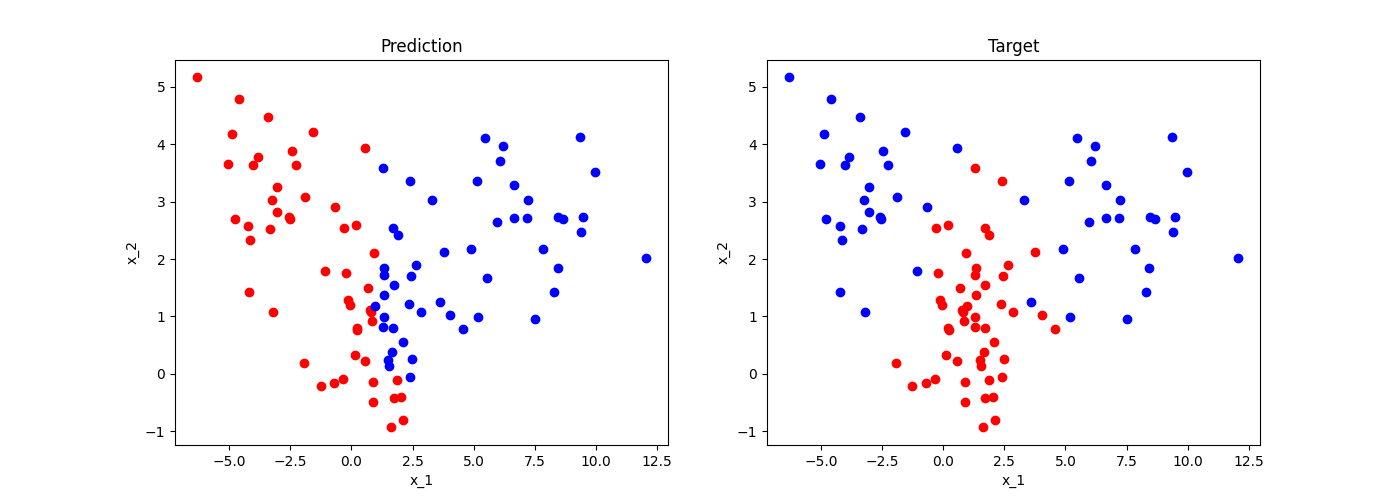

SGD with momemtum: learning rate = 0.0001, rho = 0.9
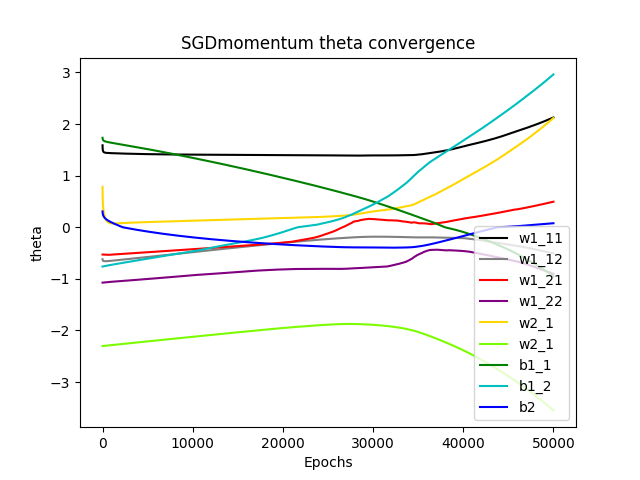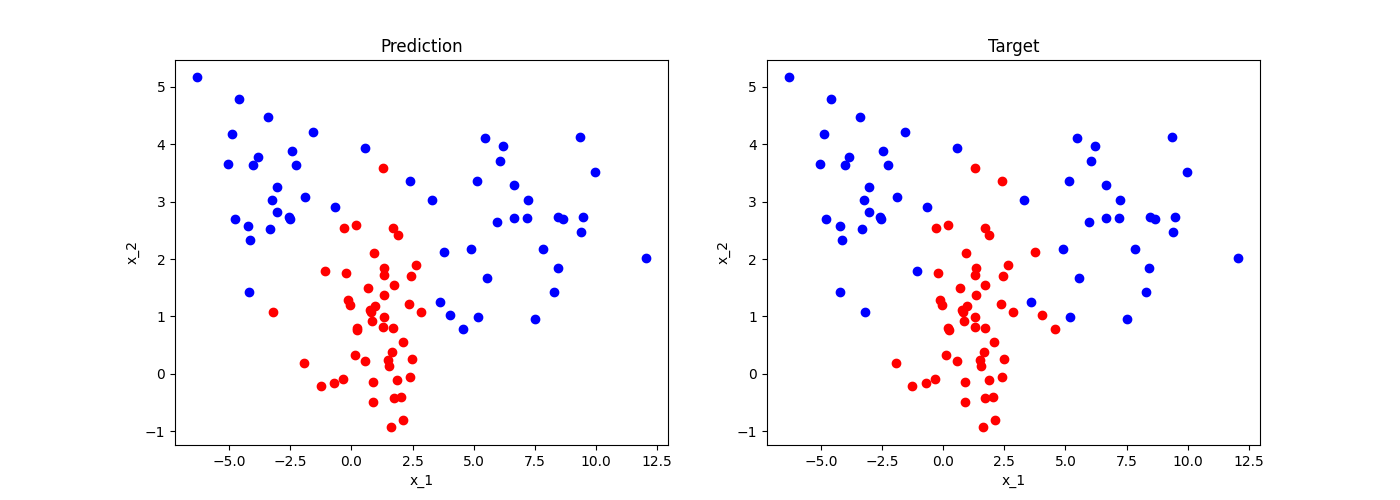

AdaGrad: learning rate = 0.005，delta = 1e-12
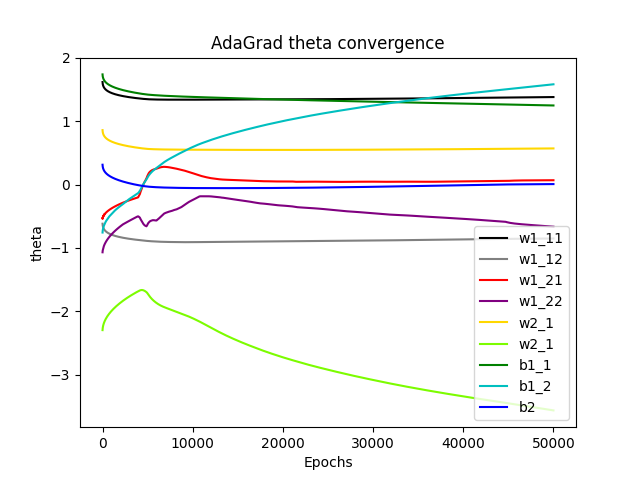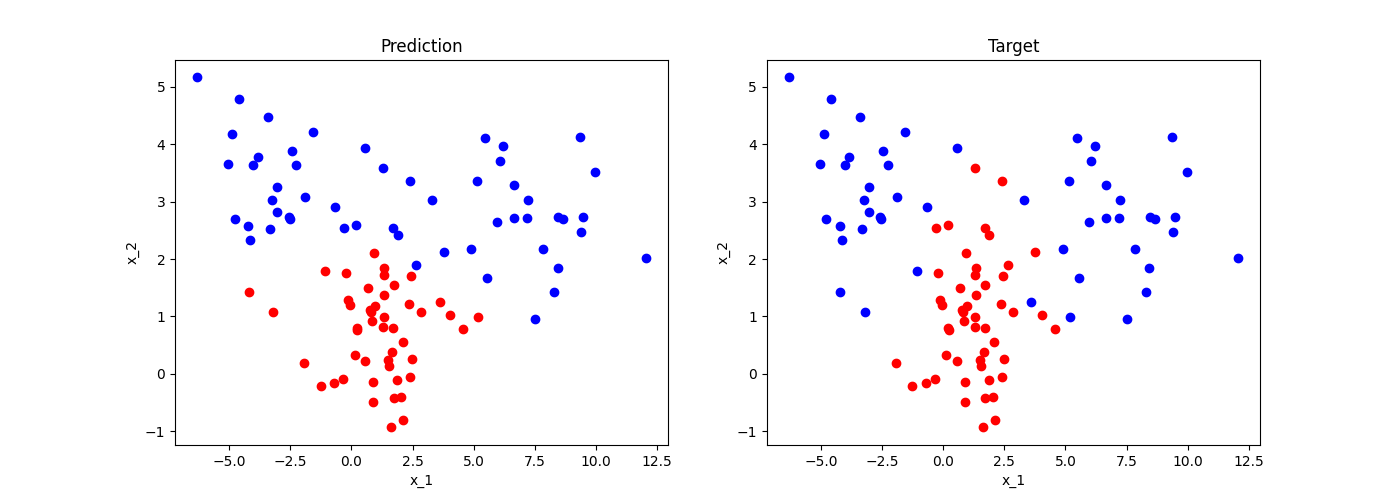

RMSprop: learning rate = 0.0001，delta = 1e-12, rho = 0.999
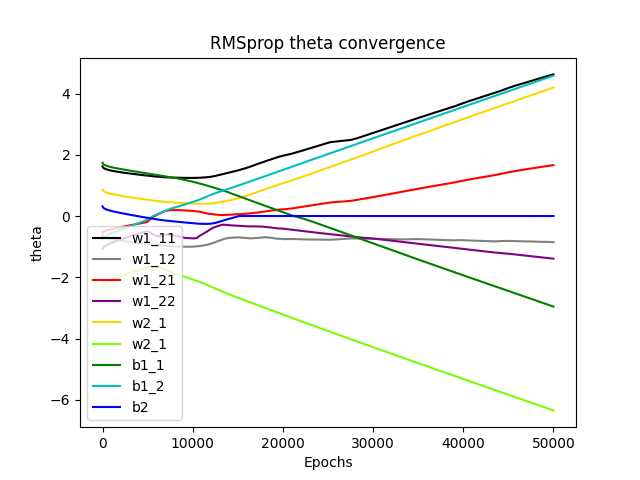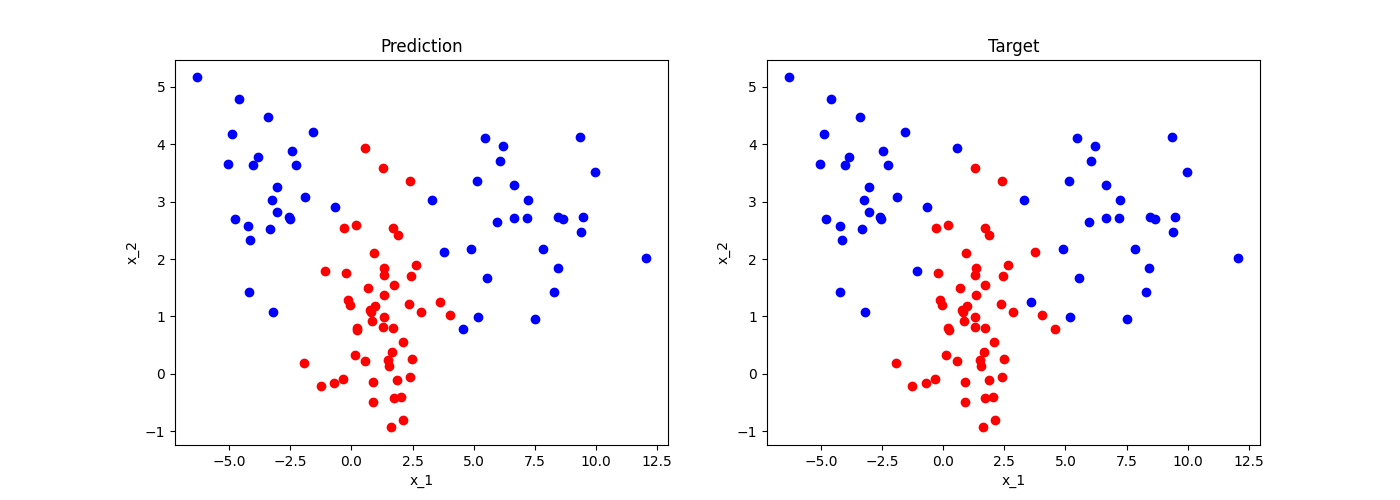

Adam: learning rate = 0.0001，delta = 1e-12,rho1 = 0.9, rho2 = 0.999
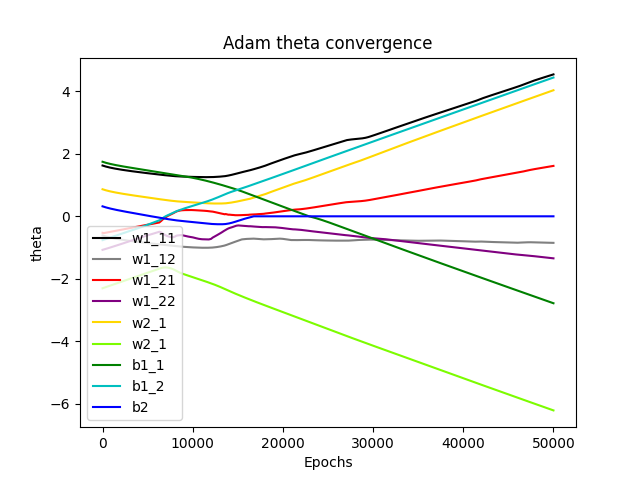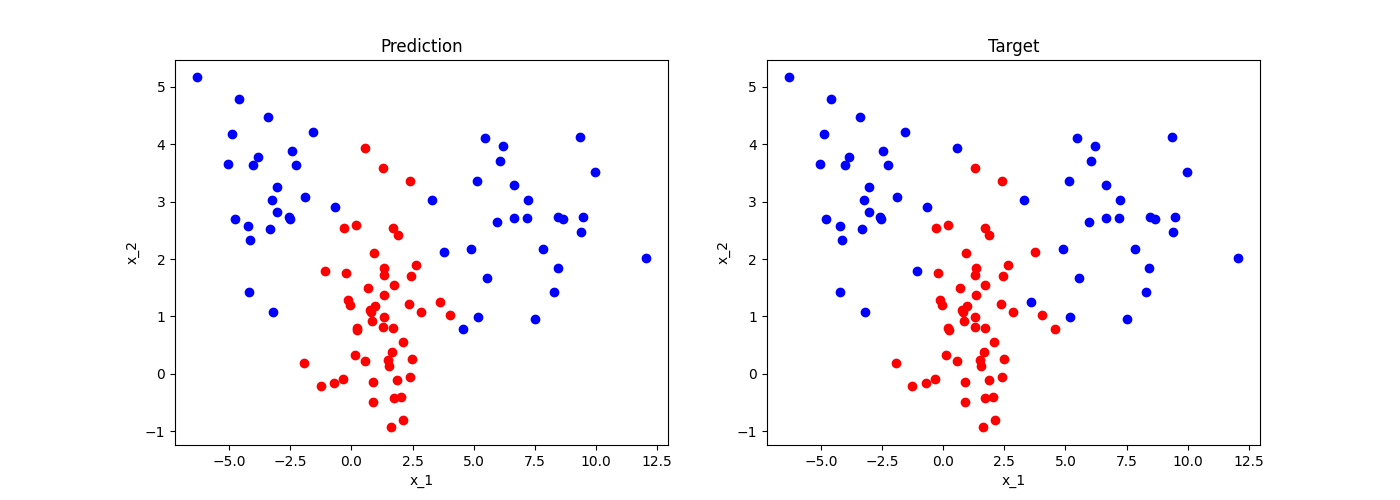

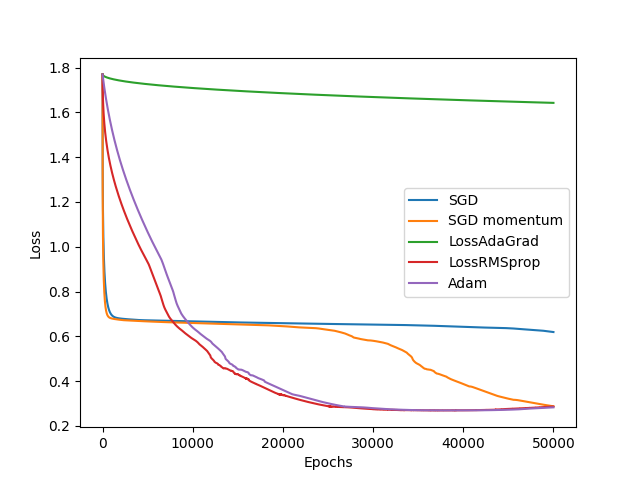


As can be seen in the above plots, by using the default parameters, Adam and RMSprop optimizers could achieve the best results. Theta parameters of them converge quickly after around 10000 epoches. And the classification is the most accurate. As for SGD, the parameters converge slow, and thus the loss is not totally minimized, resulting a relatively bad classification result. And the loss seems to be stuck in a local minimum. This situation is alleviated by implementing with SGD momentum. This algorithm does not converge as quickly as Adam, but it also achieves a good result. Adagrad algorithm is not performing very well, because the learning rate is too small. While, it could run well if the learning rate is as big as 0.001, which is 50 times bigger than the default.

**Q5: Show what happens if you significantly increase or decrease the learning
rates, and discuss your findings.**

learning rate = 0.1
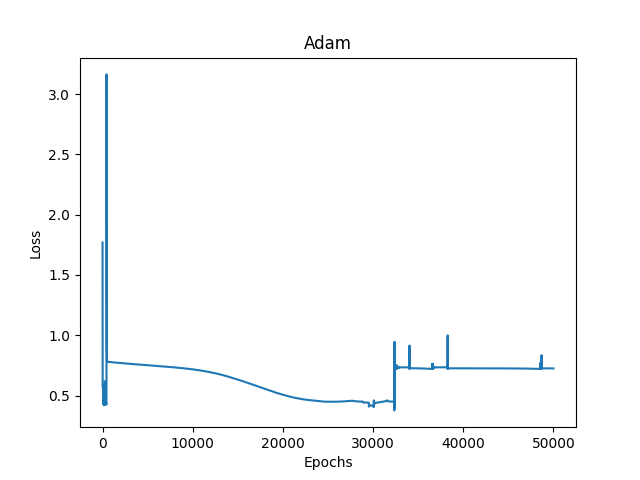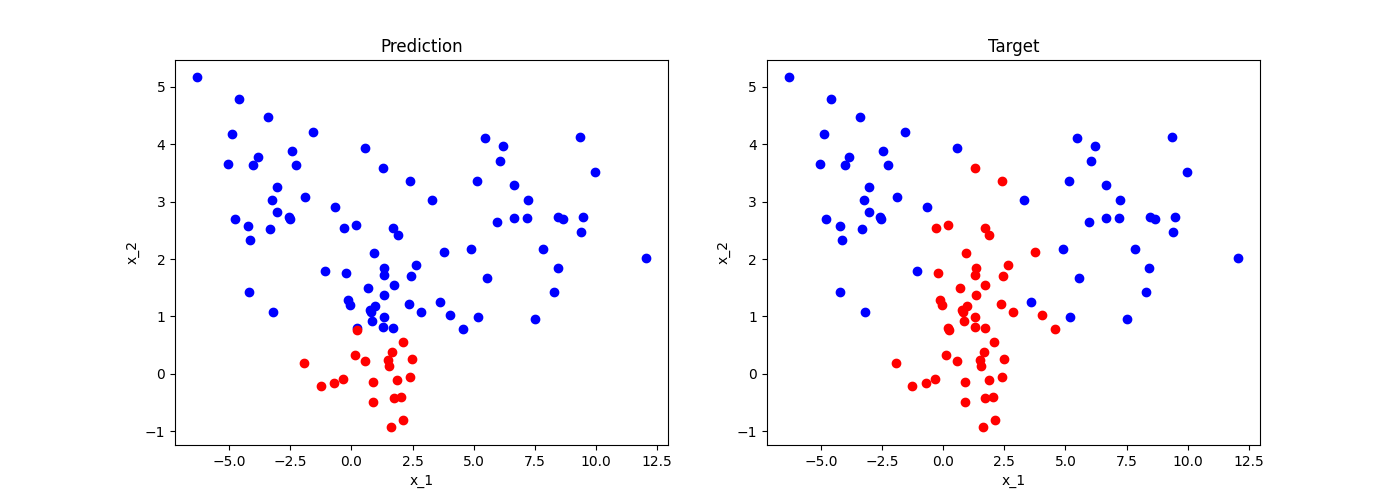


learning rate = 0.0001
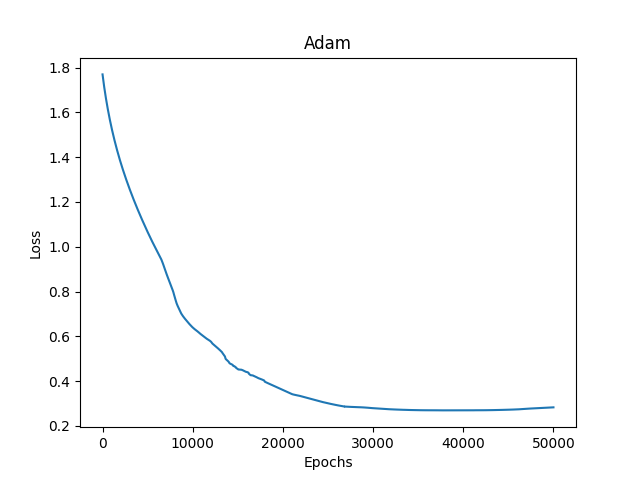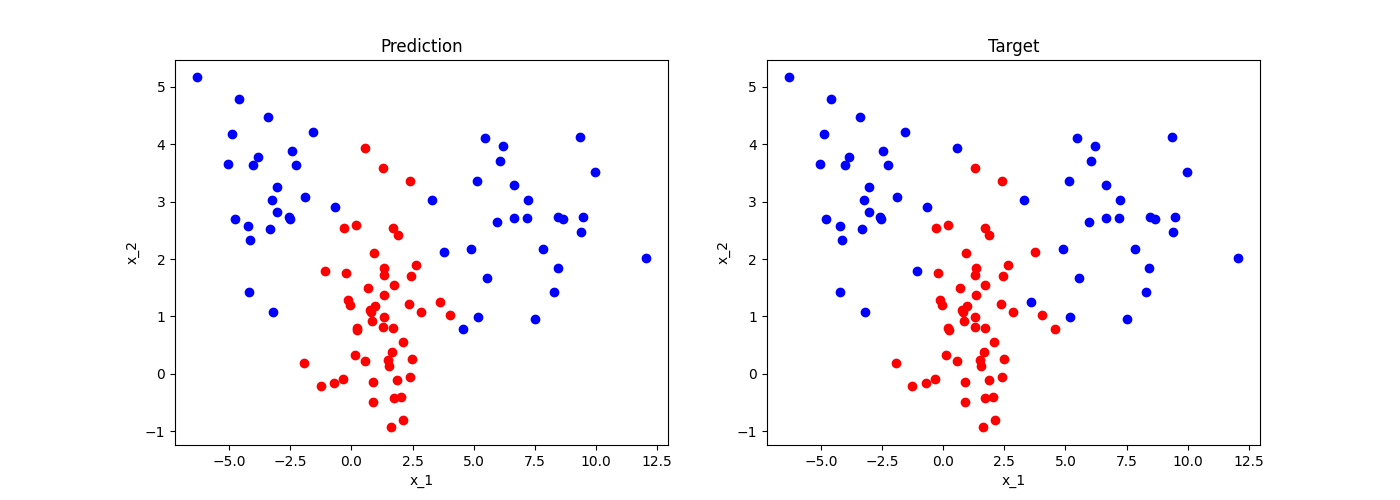


learning rate = 0.000001
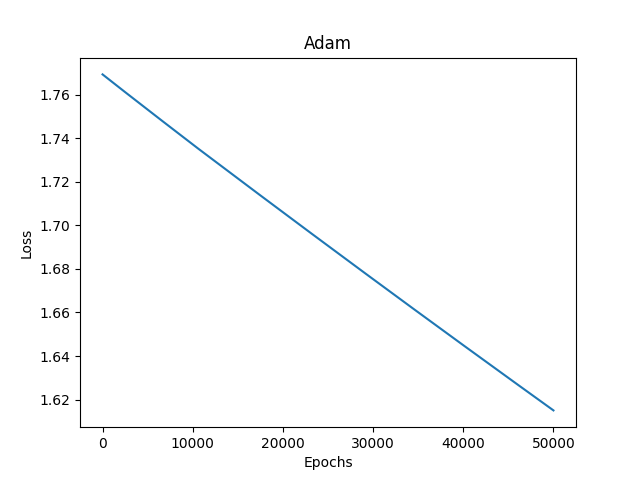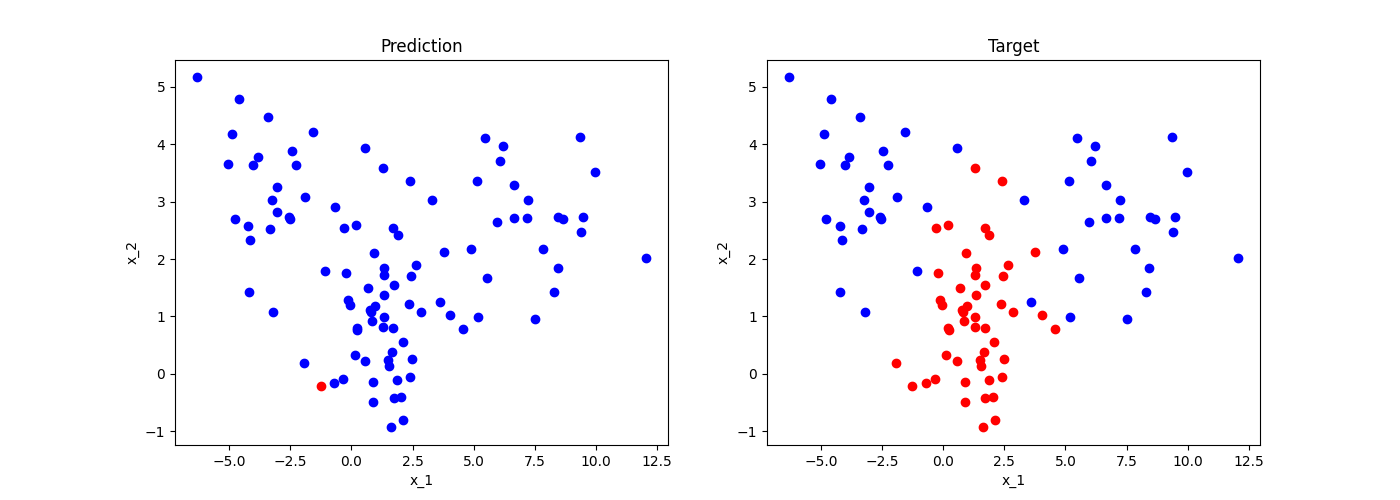

Take the Adam optimizer to illustrate the influence of learning rate, as shown in the above figures. The parameters are default and the learning rates are 0.1, 0.0001, 0.000001, respectively. When the learmomg rate is very big, the loss would diverge and never converge to the real optimum. When the learning rate is moderate, which is between 0.00001 - 0.001, it converges well and the prediction is good. While if the learning rate is too small, it converges too slow, which is a waste of time.

## 3. Regularization

**Q6: Implement both l_2 and l_1 regularization strategies, and evaluate their impact on the convergence of the parameters using the Adam solver with λ =
0.001, 0.01 and 0.1. Plot the convergence graphs, include them in your report.**

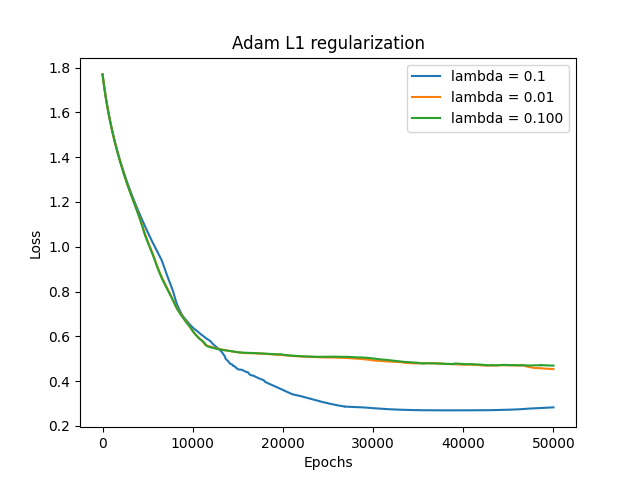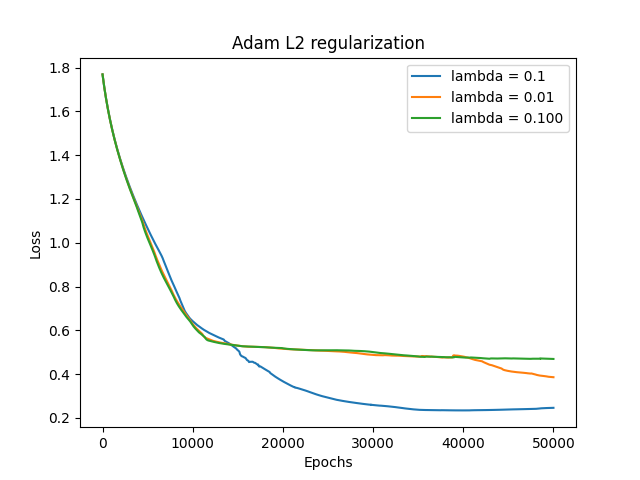

L1 regularization refers to the absolute value of each weight element, however, L2 regularization refers to the squares of each weight element and then find the square root.  L1 regularization can generate a sparse weight matrix which means only a few features contribute to the model and the most of the features do not contribute. Both regularization strategies can prevent overfitting if the regularization coefficient is very small so that the parameter theta in the iterations will decreasing. 

**Q7: Explain your findings (compare to the convergence graphs of Q4), and
explain in which cases either of these regularization strategies would be appropriate.**

We can see that if lambda is lager, both of regularization strategies add too much weight and lead to underfitting. The major reason of using regularization is to overcome issue of overfitting. When the model fits data to well i.e. capture all noise as well, regularization might be not necessary.

**Q8: Explain “dropout” regularization, and explain why it would or would not
have been an appropriate strategy for the model described above.**

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel. During the training some number of layer outputs are randomly ignored or "dropped out". It is a simple way to prevent neural networks from overfitting. It is not really necessary for the model described above to use dropout. Because it is more common for larger networks to reduce the capacity of the network. Since dropout removes some of the units from a layer, a network with dropout will weigh the remaining units more heavily during each training run to compensate for the missing inputs. Simply speaking, the network with dropout can take 2-3 times longer to train than a standard network. The computational cost of using dropout outweigh the benefit of it for simple network.